<a href="https://colab.research.google.com/github/unawuyou-create/Dissertation/blob/main/3.2.%20FIRST_Purchase_NEGATIVE_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving Firstpurchase_review.xlsx to Firstpurchase_review.xlsx


In [2]:
import pandas as pd
df = pd.read_excel("Firstpurchase_review.xlsx")
data = 'Firstpurchase_review.xlsx' # change the xlsx file name to your file name that you uploaded
df = pd.read_excel(data)
df=df[(df["rating"] == 1) | (df["rating"] == 2)]

df.head()

,Review,User_id,Title,rating,Date
85,Your search is useless if you haven’t lived in...,L&,Useless if you are a new resident to the UK,1,"June 07, 2025"
195,I didn't appreciate the minimum 30% quote pric...,Dale Rowe,I didn't appreciate the 30% quote price…,2,"June 04, 2025"
217,If your company wishes to increase its EBITA c...,NT,Move Over !,1,"June 03, 2025"
287,I refreshed a car insurance quote 24 hrs after...,ST,Refreshed car insurance quote,1,"May 30, 2025"
300,The information on the quote from a new insura...,CU,Quote had wrong info and costed hundreds,1,"May 19, 2025"


In [3]:
len(df)

254

In [4]:
target_column = 'Title'

In [5]:
# Text cleaning
!pip install contractions
import re
import string
import contractions

# drop data with missing values in the target' column
df = df.dropna(subset=[target_column])

# drop duplicate review content
df = df.drop_duplicates(subset=[target_column])

# remove contraction
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"

                      "]+", re.UNICODE)

df[target_column] = df[target_column].map(lambda x: re.sub(emoj, '', x))

# Remove punctuation
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

<>:23: SyntaxWarning: invalid escape sequence '\S'
<>:26: SyntaxWarning: invalid escape sequence '\S'
<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\S'
<>:26: SyntaxWarning: invalid escape sequence '\S'
<>:57: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3370795319.py:23: SyntaxWarning: invalid escape sequence '\S'
  df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))
/tmp/ipython-input-3370795319.py:26: SyntaxWarning: invalid escape sequence '\S'
  df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))
/tmp/ipython-input-3370795319.py:57: SyntaxWarning: invalid escape sequence '\s'
  df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.9 MB/s eta 0:00:00


In [6]:
# Text transformation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# create a list of the contents from the target column
words = df[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# remove stop words
stop_words = stopwords.words('english')
stop_words.extend(['get','go','good','also','love','well','make','come','easy','use','insurance']) #add more stopwords here
tokens_without_stopwords = [] # create a new list with stop words removed
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stop_words])


# lemmatisation
nlp = spacy.load("en_core_web_sm") # Load the spaCy model

data_lemmatised = []
for review in tokens_without_stopwords:
    doc = nlp(" ".join(review)) # Process the text with spaCy
    data_lemmatised.append([w.lemma_ for w in doc if w.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']]) # keeping only noun, adj, vb, adv

rejoin = []
for content in data_lemmatised:
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df['cleaned_review'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
df.head()

,Review,User_id,Title,rating,Date,cleaned_review
85,Your search is useless if you haven’t lived in...,L&,useless if you are a new resident to the uk,1,"June 07, 2025",useless new resident
195,I didn't appreciate the minimum 30% quote pric...,Dale Rowe,i did not appreciate the quote price,2,"June 04, 2025",appreciate price
217,If your company wishes to increase its EBITA c...,NT,move over,1,"June 03, 2025",move
287,I refreshed a car insurance quote 24 hrs after...,ST,refreshed car insurance quote,1,"May 30, 2025",refresh car quote
300,The information on the quote from a new insura...,CU,quote had wrong info and costed hundreds,1,"May 19, 2025",wrong info cost hundred


In [8]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer()

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.cleaned_review)

# convert this to a dataframe
tfidf = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names_out())

# set a threshold to drop infrequent words. here we set overall mean as the threshold. you can change the threshold to control the number of terms
threshold = tfidf.mean().mean()

# drop words based on the threshold
tfidf = tfidf.drop(tfidf.mean()[tfidf.mean() < threshold].index.values, axis=1) # Here find out the word with average word count lower than the threshold and drop them

# join the two datasets together
# tfidf = df.join(tfidf, how='left')

tfidf.head()

,absolutely,access,account,actually,add,advertising,always,app,appreciate,back,...,unwanted,update,use,useless,waiting,website,well,work,wrong,yearly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.586597,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78163,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.47662,0.0


In [9]:
# create a list of words sorted by tfidf score descending
word_tfidf = tfidf.sum(axis=0)
word_tfidf_df = pd.DataFrame({'word': word_tfidf.index, 'tfidf': word_tfidf.values})
word_tfidf_df = word_tfidf_df.sort_values(by='tfidf', ascending=False)
word_tfidf_df.head(10) # change number in head() to control the top n

,word,tfidf
71,quote,8.379516
14,car,7.767004
75,renewal,7.434693
19,compare,7.370611
74,renew,6.878748
100,use,6.346970
58,new,5.412326
83,service,4.610810
18,company,4.331549
69,price,4.181176


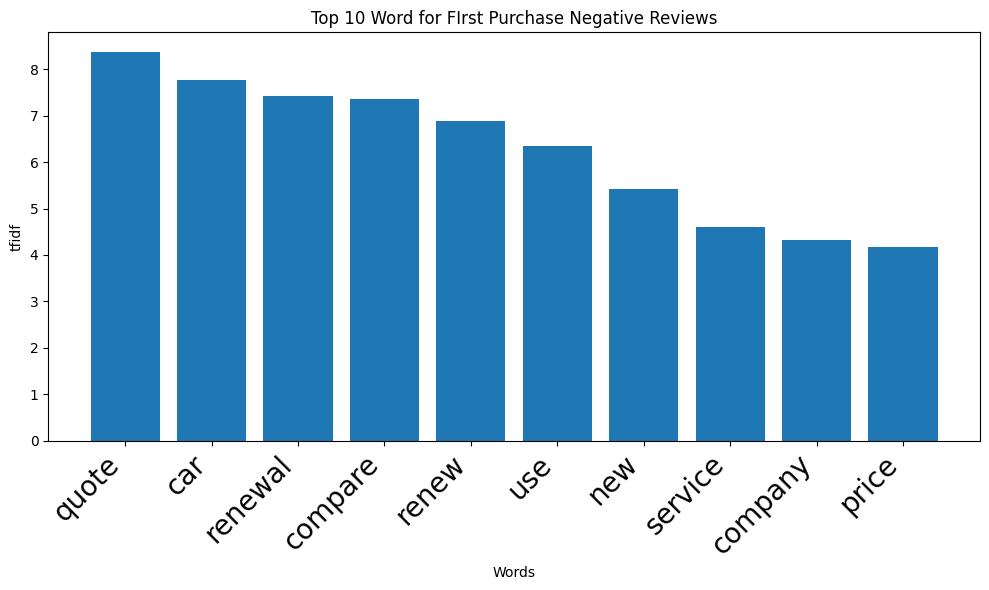

In [10]:
# create a bar showing top 10 words sorted by counts descending

import matplotlib.pyplot as plt

word_tfidf = tfidf.sum(axis=0)
word_tfidf_df = pd.DataFrame({'word': word_tfidf.index, 'tfidf': word_tfidf.values}).sort_values(by='tfidf', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(word_tfidf_df['word'].head(10), word_tfidf_df['tfidf'].head(10)) # change number in head() to control the top n
plt.xlabel("Words")
plt.ylabel("tfidf")
plt.title("Top 10 Word for FIrst Purchase Negative Reviews")
plt.xticks(rotation=45, ha='right',fontsize=20)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("pos_top_10_tfidf_words.png", dpi=300, bbox_inches='tight')
plt.show()

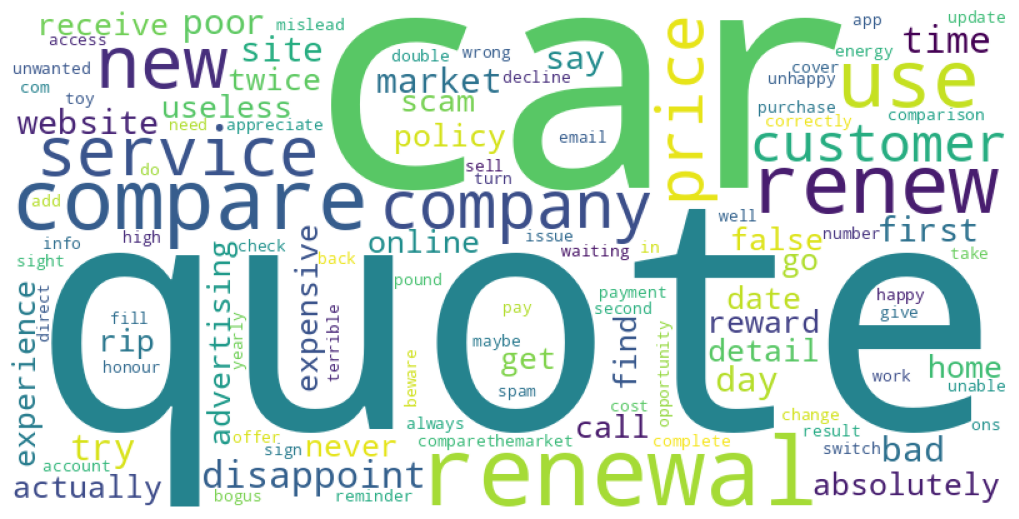

In [11]:
# create a wordcloud with tfidfvectoriser results
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_tfidf = tfidf.sum(axis=0)  # Sum tfidf across all documents

# create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("pos_tfidf_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=a90854f1656ce3b1f480a58fa7cb5f079ab5a530f559b4b9b0b3c164d4d3ed05
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [21]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT Review, Title, rating
FROM df
WHERE rating = 2
  AND( LOWER(Title) LIKE '%false%'

  )
  AND LOWER(Review) NOT LIKE '%renewal%';


"""

result_df = pysqldf(query)

# Allow pandas to display the full content in cells
pd.set_option("display.max_colwidth", None)

result_df.head()

,Review,Title,rating
0,"Insurance companies are putting out cheap prices which you advertise.\nHowever, the Insurance companies are only showing a stripped down basic cover. But then offer you better levels that they should have advertised first. This causes a greater amount of time to fine the best and most economical Insurance for you car. Double this across all sites like yours and it would be better to go through a broker in the first place. Insurance companies one again negating the reason behind comparison sites",insurance false advertising ripping us off,2
